<a href="https://colab.research.google.com/github/leihuang/scrapbook/blob/master/DANN_Moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(sys.version)

3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]


In [78]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
!ls -l /content/drive/MyDrive/Research

total 4
drwx------ 10 root root 4096 Mar  5 23:59 transferlearning


In [35]:
# !git clone https://github.com/jindongwang/transferlearning.git /content/drive/MyDrive/Research/transferlearning/

Cloning into '/content/drive/MyDrive/Research/transferlearning'...
remote: Enumerating objects: 6415, done.
remote: Counting objects: 100% (2939/2939), done.
remote: Compressing objects: 100% (1804/1804), done.
remote: Total 6415 (delta 1183), reused 2740 (delta 1077), pack-reused 3476
Receiving objects: 100% (6415/6415), 35.69 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (3429/3429), done.
Checking out files: 100% (352/352), done.


In [80]:
from sklearn.datasets import make_moons

In [81]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

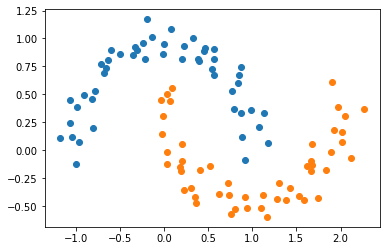

In [82]:
fig, ax = plt.subplots()
ax.scatter(*X[y==0].T)
ax.scatter(*X[y==1].T)
plt.show()

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import tqdm


class Model0(nn.Module):
    def __init__(self, width):
        super(Model0, self).__init__()
        self.layer1 = nn.Linear(2, width)
        self.layer2 = nn.Linear(width, 2)
        self.layer3 = nn.Linear(2, 1)
        
    def forward(self, xd):
        x = xd[:,:2]
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        p = torch.sigmoid(self.layer3(x))[:,0]
        return p


def train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test):
    """
    """
    losss = []
    accus = []
    ps = []

    for epoch in tqdm.trange(EPOCHS):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        losss.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            y_pred = model(X_test)
            idxs1 = X_test[:,2]==1
            idxs2 = X_test[:,2]==2
            bools1 = ((y_pred[idxs1]>0.5).long() == y_test[idxs1]).type(torch.FloatTensor)
            bools2 = ((y_pred[idxs2]>0.5).long() == y_test[idxs2]).type(torch.FloatTensor)
            accus.append([bools1.mean(), bools2.mean()])

    return np.array(losss), np.array(accus)



model0 = Model0(5)
optimizer0 = torch.optim.Adam(model0.parameters(), lr=0.001)
